https://blog.keras.io/building-autoencoders-in-keras.html

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Input,Dense
from keras.models import Model
from keras.datasets import mnist

In [27]:
%matplotlib inline

In [ ]:
encoding_dim = 32

In [3]:
input_img = Input(shape=(784,))

In [4]:
encoded = Dense(encoding_dim, activation='relu')(input_img)

In [5]:
decoded = Dense(784,activation='sigmoid')(encoded)

In [6]:
autoencoder = Model(input=input_img, output=decoded)

In [7]:
encoder = Model(input=input_img, output = encoded)

In [8]:
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

In [9]:
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')

In [12]:
(x_train,_),(x_test,_) = mnist.load_data()

15187968/15296311 [============================>.] - ETA: 0s

In [18]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [30]:
autoencoder.fit(x_train, x_train,
               nb_epoch = 40,
               batch_size = 256,
               shuffle=True,
               validation_data=(x_test,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 14s - loss: 0.0042 - val_loss: 1.1554
Epoch 2/40
60000/60000 [==============================] - 14s - loss: 0.0042 - val_loss: 1.1562
Epoch 3/40
60000/60000 [==============================] - 15s - loss: 0.0042 - val_loss: 1.1568
Epoch 4/40
60000/60000 [==============================] - 15s - loss: 0.0042 - val_loss: 1.1573
Epoch 5/40
60000/60000 [==============================] - 15s - loss: 0.0042 - val_loss: 1.1576
Epoch 6/40
60000/60000 [==============================] - 15s - loss: 0.0042 - val_loss: 1.1579
Epoch 7/40
60000/60000 [==============================] - 16s - loss: 0.0042 - val_loss: 1.1580
Epoch 8/40
60000/60000 [==============================] - 16s - loss: 0.0042 - val_loss: 1.1581
Epoch 9/40
60000/60000 [==============================] - 15s - loss: 0.0041 - val_loss: 1.1581
Epoch 10/40
60000/60000 [==============================] - 17s - loss: 0.0041 - val_lo

In [20]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

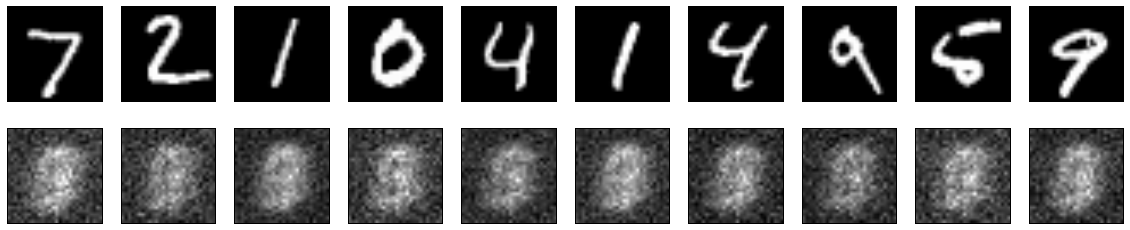

In [28]:
n = 10

plt.figure(figsize=(20,4))
for i in range(n):
    # original digit
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # reconstruction
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

# using 10 epochs
    

In [31]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

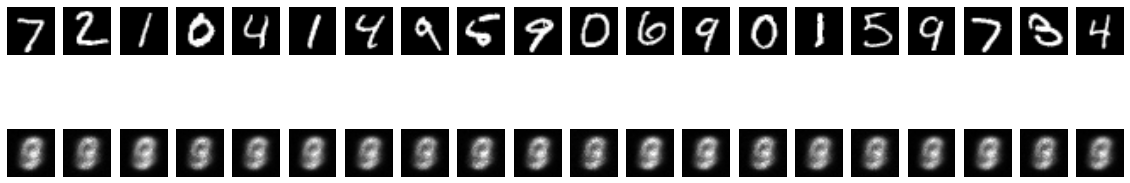

In [34]:
n = 20

plt.figure(figsize=(20,4))
for i in range(n):
    # original digit
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # reconstruction
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

# using 40 epochs
    